In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# read from a csv file into a pd dataframe
df = pd.read_csv('~/Downloads/bi_ranking.csv', low_memory=False)

In [16]:
# get the anio with 2023
df = df[df['anio'] == 2023]

# print all the columns
print(df.columns)

# read from d
print(df.head(100))

# print the total number of rows
print(df.shape[0])


Index(['anio', 'expediente', 'posicion_general', 'cia_imvalores',
       'id_estado_financiero', 'ingresos_ventas', 'activos', 'patrimonio',
       'utilidad_an_imp', 'impuesto_renta', 'n_empleados', 'ingresos_totales',
       'utilidad_ejercicio', 'utilidad_neta', 'cod_segmento', 'ciiu_n1',
       'ciiu_n6', 'liquidez_corriente', 'prueba_acida', 'end_activo',
       'end_patrimonial', 'end_activo_fijo', 'end_corto_plazo',
       'end_largo_plazo', 'cobertura_interes', 'apalancamiento',
       'apalancamiento_financiero', 'end_patrimonial_ct',
       'end_patrimonial_nct', 'apalancamiento_c_l_plazo', 'rot_cartera',
       'rot_activo_fijo', 'rot_ventas', 'per_med_cobranza', 'per_med_pago',
       'impac_gasto_a_v', 'impac_carga_finan', 'rent_neta_activo',
       'margen_bruto', 'margen_operacional', 'rent_neta_ventas',
       'rent_ope_patrimonio', 'rent_ope_activo', 'roe', 'roa',
       'fortaleza_patrimonial', 'gastos_financieros', 'gastos_admin_ventas',
       'depreciaciones', 'amo

In [27]:
# lets's get all the companies with activos of less than 5k
df_lower_5k = df[df['activos'] < 5000]

print(df_lower_5k['activos'].describe())

# let get the companies with activos of more than 5k
df_higher_5k = df[df['activos'] > 5000]

print(df_higher_5k['activos'].describe())

# let's get the top 10 companies with the highest activos
df_top_10 = df.nlargest(10, 'activos')


count    709405.000000
mean        492.893884
std         936.304815
min       -4121.170000
25%           0.000000
50%           0.000000
75%         800.000000
max        4999.930000
Name: activos, dtype: float64
count    6.960900e+05
mean     2.209634e+06
std      2.174084e+07
min      5.000010e+03
25%      3.529652e+04
50%      1.427841e+05
75%      5.351940e+05
max      2.564376e+09
Name: activos, dtype: float64


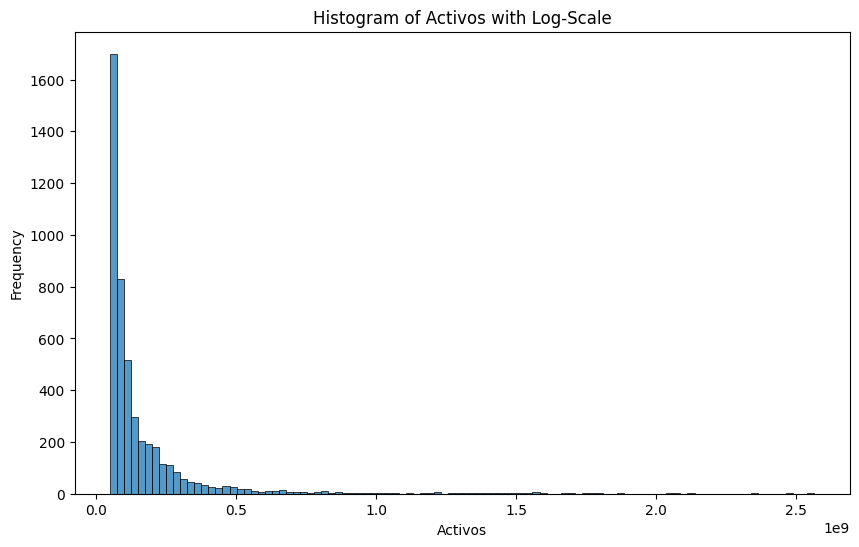

In [34]:
# get the type of the activos column
#print(df['activos'].dtype)


#get he distribution of the activos ove the companies
#print(df['activos'].describe())

# transform the log of the activos

# make me scatter plot of all value of activos

#df['activos'].plot(kind='hist', logy=True, x='activos')
# Sample DataFrame

# Apply logarithmic transformation
#df['log_activos'] = np.log(df['activos'])

# take out all of the companies with activos of less than 1000
#df = df[df['activos'] > 10000]

# take away all the comanies with values less than 5k
df_lower = df[df['activos'] < 5000]
df_higher = df[df['activos'] >= 50000000]


# let classify the activos into categories
# 0 - k - small
# 100m - 1- medium
# 500m - 3b - large


# Plot the histogram with log scale
plt.figure(figsize=(10, 6))
sns.histplot(df_higher['activos'], bins=100)
plt.xlabel('Activos')
plt.ylabel('Frequency')
plt.title('Histogram of Activos with Log-Scale')

# add more ticks to the x-axis every 10k
#plt.xticks(np.arange(0, 500000, 10000))

# the labels of the x-axis are too close to each other
# so we can rotate them to make them more readable
#plt.xticks(rotation=50)

# Set the x-axis to log scale and adjust the ticks to show the original values
'''
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='x')
'''
plt.show()

# make a histogram of the activos with a log scale
# using plt instead of the pandas plot 

# Adding title and labels
#plt.title('Activos Distribution')
#plt.xlabel('Log-Activos')
#plt.ylabel('Frequency')

# Displaying the plot
#plt.show()


# get the companies with activos higher then 500k
#df_higher_500k = df[df['activos'] >= 500000]
#df_higher_500k = df_higher_500k.sort_values(by='activos', ascending=False)

# get the ones with lower then 500k
#df_lower_500k = df[df['activos'] < 500000]
#df_lower_500k = df_lower_500k.sort_values(by='activos', ascending=False)

#print('companies with higher than 500 activos: ', df_higher_500k.shape[0])
#print('companies with lower than 500 activos: ', df_lower_500k.shape[0])

In [35]:
# get the companies with activos higher then 1m
df_higher_500k = df[df['activos'] >= 500000]
df_higher_500k = df_higher_500k.sort_values(by='activos', ascending=False)

# get the ones with lower then 500k
df_lower_500k = df[df['activos'] < 500000]
df_lower_500k = df_lower_500k.sort_values(by='activos', ascending=False)

print('companies with higher than 500 activos: ', df_higher_500k.shape[0])
print('companies with lower than 500 activos: ', df_lower_500k.shape[0])

print(df_higher_500k['activos'].head(10))

companies with higher than 500 activos:  179114
companies with lower than 500 activos:  1228685
84860     2.564376e+09
1159      2.480404e+09
180778    2.343207e+09
297728    2.121860e+09
84861     2.070951e+09
356611    2.051462e+09
180779    1.880507e+09
84862     1.791278e+09
1160      1.776014e+09
180780    1.734747e+09
Name: activos, dtype: float64


In [36]:
import numpy as np

# Apply log transformation
filtered_df['log_activos'] = np.log1p(df['activos'])

# Plotting the histogram with filtered data
plt.hist(filtered_df['log_activos'], bins=50, edgecolor='black')

# Adding title and labels
plt.title('Distribution of Company Revenues (Without Outliers)')
plt.xlabel('Revenue (Billions)')
plt.ylabel('Number of Companies')

# Displaying the histogram
plt.show()



/home/telix/.pyenv/versions/3.11.7/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


NameError: name 'filtered_df' is not defined

count    1.532310e+05
mean     1.054783e+06
std      1.640851e+07
min      0.000000e+00
25%      1.000200e+02
50%      6.395650e+03
75%      1.275190e+05
max      2.564376e+09
Name: activos, dtype: float64


<Axes: ylabel='Frequency'>

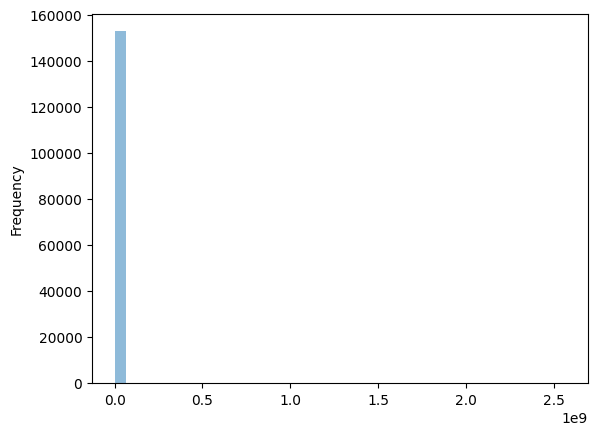

In [ ]:
# make the log transformation of the activos
df['log_activos'] = np.log1p(df['activos'])
# make a chart distribution of the activos
print(df['activos'].describe())
df['activos'].plot.hist(bins=40, alpha=0.5)

In [ ]:

# Calculate the 95th percentile
percentile_95 = df['activos'].quantile(0.95)

# Filter the DataFrame to include only companies with assets greater than the 95th percentile
extremely_high_companies = df[df['activos'] > percentile_95]

print(extremely_high_companies.shape[0])
extremely_high_companies.describe()



7662


,anio,expediente,posicion_general,cia_imvalores,id_estado_financiero,ingresos_ventas,activos,patrimonio,utilidad_an_imp,impuesto_renta,...,roa,fortaleza_patrimonial,gastos_financieros,gastos_admin_ventas,depreciaciones,amortizaciones,costos_ventas_prod,deuda_total,deuda_total_c_plazo,total_gastos
count,7662.0,7662.000000,7662.000000,7662.000000,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,...,7662.000000,7662.000000,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03,7.662000e+03
mean,2023.0,218691.099321,4295.330332,0.033020,2.285546e+06,1.601980e+07,1.864717e+07,8.495556e+06,1.426160e+10,2.828162e+05,...,0.052764,0.753867,3.495348e+05,3.511158e+06,1.381019e+05,5.523900e+04,1.082594e+07,1.077479e+06,1.005899e+05,4.056942e+06
std,0.0,246485.290229,3412.371218,0.178701,3.562453e+04,6.762746e+07,7.111579e+07,4.455521e+07,1.248264e+12,2.150152e+06,...,0.123588,27.140038,2.049224e+06,1.636260e+07,1.894322e+06,1.308748e+06,5.038905e+07,5.631379e+06,1.539312e+06,1.772721e+07
min,2023.0,2.000000,1.000000,0.000000,2.195241e+06,0.000000e+00,2.217079e+06,-1.081295e+08,-4.774427e+07,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2023.0,53385.000000,1923.250000,0.000000,2.258964e+06,8.385161e+05,3.340332e+06,7.467526e+05,0.000000e+00,0.000000e+00,...,0.000000,0.000000,1.212418e+03,2.195758e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.105382e+05
50%,2023.0,125455.500000,3931.500000,0.000000,2.291016e+06,3.672277e+06,5.533602e+06,2.089435e+06,5.715294e+04,2.359842e+04,...,0.020000,0.100000,3.989626e+04,7.908292e+05,9.864180e+03,0.000000e+00,1.678500e+06,6.511150e+02,0.000000e+00,9.807263e+05
75%,2023.0,201152.500000,6211.750000,0.000000,2.312730e+06,1.020237e+07,1.249369e+07,5.208771e+06,4.094029e+05,1.186955e+05,...,0.060000,0.400000,1.785361e+05,2.243500e+06,6.219685e+04,0.000000e+00,6.428412e+06,3.809024e+05,0.000000e+00,2.605097e+06
max,2023.0,753967.000000,120431.000000,1.000000,2.345498e+06,2.483015e+09,2.564376e+09,1.785967e+09,1.092641e+14,9.341411e+07,...,4.740000,2358.760000,1.217090e+08,6.604890e+08,1.315138e+08,7.274641e+07,1.817218e+09,1.534114e+08,6.472873e+07,7.007793e+08


In [38]:
import plotly.express as px
data = px.data.iris()

import altair as alt
alt.Chart(data=data).mark_point().encode(
    x="sepal_width",
    y="sepal_length",
    color="species",
    size='sepal_length'
).interactive()


alt.Chart(...)